In [2]:
# Import the necessary libraries to use for this assignment
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import time
from sklearn.linear_model import LinearRegression

In [3]:
# Load the dataset
walmart = pd.read_csv('Walmart Data Analysis and Forcasting.csv', sep=',', on_bad_lines='skip')

In [4]:
# Pre-process necessary features:

# Drop unnecessary columns
df = walmart[[
    # "Store",
    "Date",
    "Weekly_Sales",
    # "Holiday_Flag",
    # "Temperature",
    # "Fuel_Price",
    # "CPI",
    # "Unemployment",
]]


# Reformat date  to unix format, should not concat so much operation for debugging reasons
df["Date"] = [datetime.datetime.strptime(date, '%d-%m-%Y').strftime('%d/%m/%Y') for date in df["Date"]]
df["Date"] = [time.mktime(datetime.datetime.strptime(date, '%d/%m/%Y').timetuple()) for date in df["Date"]]

# Drop rows with missing values
df = df.dropna()

# split data
X = df[["Date"]]
Y = df[['Weekly_Sales']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.8, random_state = 101)

# Define the pipeline steps
# pipeline = Pipeline([('model', LinearRegression(n_jobs=-1))])
pipeline = Pipeline([('model', RandomForestRegressor(random_state = 1))])

pipeline.fit(x_train, y_train)

df.head()

C:\Users\cheey\AppData\Local\Temp\ipykernel_17288\428790242.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = [datetime.datetime.strptime(date, '%d-%m-%Y').strftime('%d/%m/%Y') for date in df["Date"]]
C:\Users\cheey\AppData\Local\Temp\ipykernel_17288\428790242.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = [time.mktime(datetime.datetime.strptime(date, '%d/%m/%Y').timetuple()) for date in df["Date"]]
c:\Users\cheey\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataCo

,Date,Weekly_Sales
0,1.265324e+09,1643690.90
1,1.265929e+09,1641957.44
2,1.266534e+09,1611968.17
3,1.267139e+09,1409727.59
4,1.267744e+09,1554806.68


1373580000.0
[877119.69873027]
1374184800.0
[877119.69873027]
1374789600.0
[877119.69873027]
1375394400.0
[877119.69873027]
              Date  Weekly_Sales      Forecast
0     1.265324e+09    1643690.90           NaN
1     1.265929e+09    1641957.44           NaN
2     1.266534e+09    1611968.17           NaN
3     1.267139e+09    1409727.59           NaN
4     1.267744e+09    1554806.68           NaN
...            ...           ...           ...
6430  1.348783e+09     713173.95           NaN
6431  1.349388e+09     733455.07           NaN
6432  1.349993e+09     734464.36           NaN
6433  1.371161e+09           NaN           NaN
6434  1.375394e+09           NaN  877119.69873

[6435 rows x 3 columns]


c:\Users\cheey\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\cheey\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\cheey\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\cheey\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


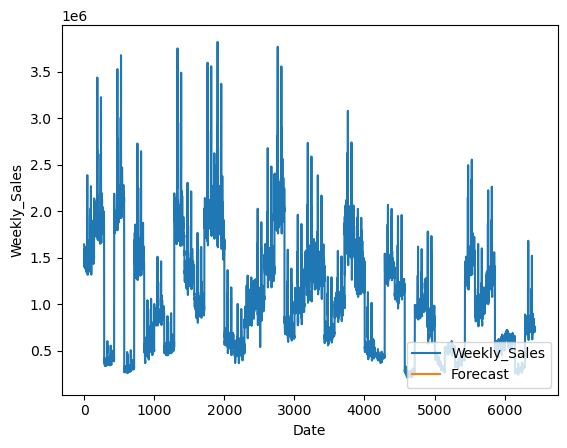

In [49]:
# create forecast
df["Forecast"] = np.nan

# week in seconds
week = 604800

# loop trough weeks
for i in range (4):
    last_date = df["Date"].iloc[-1] + week
    print(last_date)
    predict = pipeline.predict([[last_date]])
    # row = pd.DataFrame({'Date':last_date, 'Weekly_Sales':np.nan, 'Forecast':predict[0][0]})
    # print(df)
    # print(row)
    print(predict)
    
    df.iloc[-1] = pd.DataFrame({'Date':last_date, 'Weekly_Sales':np.nan, 'Forecast':predict})

print(df)
# plot data frames
df['Weekly_Sales'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.show()